In [1]:
#import all necessary packages
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv(r'C:\Users\Administrator\OneDrive\MSDA\Predictive modeling 208\Medical\medical_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [82]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [83]:
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [84]:
pd.set_option('display.max_columns', None)
df.head(5)

CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  Population      Area          TimeZone  \
0  34.34960 -86.72508        2951  Suburban   America/Chicago   
1  30.84513 -85.22907       11303     Urban   America/Chicago   
2  43.54321 -96.63772       17125  Suburban   America/Chicago   
3  43.89744 -93.51479        2162  Suburban   America/Chicago   
4  37.59894 -76.88958        5287     Rural  America/New_York   

                                Job  Children  Age    Income   Marital  \
0  Psychologist, sport and exercise         1   53  86575.93  Divorced   
1      Community development worker         3   51  46805.99   Married   
2           Chief Executive Officer         3   53  14370.14   Widowed   
3               Early years teacher         0   78  39741.49   Married   
4       Health promotion specialist         1   22   1209.56   Widowed   

   Gender ReAdmis  VitD_levels  Doc_visits  Full_meals_eaten  vitD_supp  \
0    Male      No    19.141466           6                 0          0   
1  Female      No    18.940352           4                 2          1   
2  Female      No    18.057507           4                 1          0   
3    Male      No    16.576858           4                 1          0   
4  Female      No    17.439069           5                 0          2   

  Soft_drink        Initial_admin HighBlood Stroke Complication_risk  \
0         No  Emergency Admission       Yes     No            Medium   
1         No  Emergency Admission       Yes     No              High   
2         No   Elective Admission       Yes     No            Medium   
3         No   Elective Admission        No    Yes            Medium   
4        Yes   Elective Admission        No     No               Low   

  Overweight Arthritis Diabetes Hyperlipidemia BackPain Anxiety  \
0         No       Yes      Yes             No      Yes     Yes   
1        Yes        No       No             No       No      No   
2        Yes        No      Yes             No       No      No   
3         No       Yes       No             No       No      No   
4         No        No       No            Yes       No      No   

  Allergic_rhinitis Reflux_esophagitis Asthma     Services  Initial_days  \
0               Yes                 No    Yes   Blood Work     10.585770   
1                No                Yes     No  Intravenous     15.129562   
2                No                 No     No   Blood Work      4.772177   
3                No                Yes    Yes   Blood Work      1.714879   
4               Yes                 No     No      CT Scan      1.254807   

   TotalCharge  Additional_charges  Item1  Item2  Item3  Item4  Item5  Item6  \
0  3726.702860        17939.403420      3      3      2      2      4      3   
1  4193.190458        17612.998120      3      4      3      4      4      4   
2  2434.234222        17505.192460      2      4      4      4      3      4   
3  2127.830423        12993.437350      3      5      5      3      4      5   
4  2113.073274         3716.525786      2      1      3      3      5      3   

   Item7  Item8  
0      3      4  
1      3      3  
2      3  

In [85]:
df['Services'].unique()

array(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], dtype=object)

In [86]:
df['Initial_admin'].unique()

array(['Emergency Admission', 'Elective Admission',
       'Observation Admission'], dtype=object)

In [87]:
df_new = df.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Area','TimeZone','Population','Job','Marital','ReAdmis'], axis =1)

In [88]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Gender              10000 non-null  object 
 4   VitD_levels         10000 non-null  float64
 5   Doc_visits          10000 non-null  int64  
 6   Full_meals_eaten    10000 non-null  int64  
 7   vitD_supp           10000 non-null  int64  
 8   Soft_drink          10000 non-null  object 
 9   Initial_admin       10000 non-null  object 
 10  HighBlood           10000 non-null  object 
 11  Stroke              10000 non-null  object 
 12  Complication_risk   10000 non-null  object 
 13  Overweight          10000 non-null  object 
 14  Arthritis           10000 non-null  object 
 15  Diabetes            10000 non-null  object 
 16  Hyper

In [89]:
df_new = df_new.replace(to_replace={'Yes':1, 'No':0})

In [90]:
df_new.head()

Children  Age    Income  Gender  VitD_levels  Doc_visits  Full_meals_eaten  \
0         1   53  86575.93    Male    19.141466           6                 0   
1         3   51  46805.99  Female    18.940352           4                 2   
2         3   53  14370.14  Female    18.057507           4                 1   
3         0   78  39741.49    Male    16.576858           4                 1   
4         1   22   1209.56  Female    17.439069           5                 0   

   vitD_supp  Soft_drink        Initial_admin  HighBlood  Stroke  \
0          0           0  Emergency Admission          1       0   
1          1           0  Emergency Admission          1       0   
2          0           0   Elective Admission          1       0   
3          0           0   Elective Admission          0       1   
4          2           1   Elective Admission          0       0   

  Complication_risk  Overweight  Arthritis  Diabetes  Hyperlipidemia  \
0            Medium           0          1         1               0   
1              High           1          0         0               0   
2            Medium           1          0         1               0   
3            Medium           0          1         0               0   
4               Low           0          0         0               1   

   BackPain  Anxiety  Allergic_rhinitis  Reflux_esophagitis  Asthma  \
0         1        1                  1                   0       1   
1         0        0                  0                   1       0   
2         0        0                  0                   0       0   
3         0        0                  0                   1       1   
4         0        0                  1                   0       0   

      Services  Initial_days  TotalCharge  Additional_charges  Item1  Item2  \
0   Blood Work     10.585770  3726.702860        17939.403420      3      3   
1  Intravenous     15.129562  4193.190458        17612.998120      3      4   
2   Blood Work      4.772177  2434.234222        17505.192460      2      4   
3   Blood Work      1.714879  2127.830423        12993.437350      3      5   
4      CT Scan      1.254807  2113.073274         3716.525786      2      1   

   Item3  Item4  Item5  Item6  Item7  Item8  
0      2      2      4      3      3      4  
1      3      4      4      4      3      3  
2      4      4      3      4      3      3  
3      5      3      4      5      5      5  
4      3      3      5      3      4      3

In [91]:
#statistical summary of variables
df_new.describe()

Children           Age         Income   VitD_levels    Doc_visits  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean       2.097200     53.511700   40490.495160     17.964262      5.012200   
std        2.163659     20.638538   28521.153293      2.017231      1.045734   
min        0.000000     18.000000     154.080000      9.806483      1.000000   
25%        0.000000     36.000000   19598.775000     16.626439      4.000000   
50%        1.000000     53.000000   33768.420000     17.951122      5.000000   
75%        3.000000     71.000000   54296.402500     19.347963      6.000000   
max       10.000000     89.000000  207249.100000     26.394449      9.000000   

       Full_meals_eaten     vitD_supp    Soft_drink     HighBlood  \
count      10000.000000  10000.000000  10000.000000  10000.000000   
mean           1.001400      0.398900      0.257500      0.409000   
std            1.008117      0.628505      0.437279      0.491674   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.000000      0.000000      0.000000   
50%            1.000000      0.000000      0.000000      0.000000   
75%            2.000000      1.000000      1.000000      1.000000   
max            7.000000      5.000000      1.000000      1.000000   

             Stroke    Overweight     Arthritis     Diabetes  Hyperlipidemia  \
count  10000.000000  10000.000000  10000.000000  10000.00000    10000.000000   
mean       0.199300      0.709400      0.357400      0.27380        0.337200   
std        0.399494      0.454062      0.479258      0.44593        0.472777   
min        0.000000      0.000000      0.000000      0.00000        0.000000   
25%        0.000000      0.000000      0.000000      0.00000        0.000000   
50%        0.000000      1.000000      0.000000      0.00000        0.000000   
75%        0.000000      1.000000      1.000000      1.00000        1.000000   
max        1.000000      1.000000      1.000000      1.00000        1.000000   

           BackPain       Anxiety  Allergic_rhinitis  Reflux_esophagitis  \
count  10000.000000  10000.000000       10000.000000        10000.000000   
mean       0.411400      0.321500           0.394100            0.413500   
std        0.492112      0.467076           0.488681            0.492486   
min        0.000000      0.000000           0.000000            0.000000   
25%        0.000000      0.000000           0.000000            0.000000   
50%        0.000000      0.000000           0.000000            0.000000   
75%        1.000000      1.000000           1.000000            1.000000   
max        1.000000      1.000000           1.000000            1.000000   

            Asthma  Initial_days   TotalCharge  Additional_charges  \
count  10000.00000  10000.000000  10000.000000        10000.000000   
mean       0.28930     34.455299   5312.172769        12934.528587   
std        0.45346     26.309341   2180.393838         6542.601544   
min        0.00000      1.001981   1938.312067         3125.703000   
25%        0.00000      7.896215   3179.374015         7986.487755   
50%        0.00000     35.836244   5213.952000        11573.977735   
75%        1.00000     61.161020   7459.699750        15626.490000   
max        1.00000     71.981490   9180.728000        30566.070000   

              Item1         Item2         Item3         Item4         Item5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       3.518800      3.506700      3.511100      3.515100      3.496900   
std        1.031966      1.034825      1.032755      1.036282      1.030192   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      3.000000      3.000000      3.000000      3.000000   
50%        4.000000      3.000000      4.000000      4.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   

In [92]:
#statistical summary of categorical variables
df_new['Soft_drink'].value_counts()

0    7425
1    2575
Name: Soft_drink, dtype: int64

In [93]:
for col in df_new:
    print (col)
    print (df_new[col].unique())

Children
[ 1  3  0  7  2  4 10  5  8  6  9]
Age
[53 51 78 22 76 50 40 48 55 64 41 45 85 57 44 54 72 84 86 52 31 37 19 75
 70 69 56 32 27 65 25 79 24 89 58 60 33 83 66 73 35 43 63 36 39 29 20 34
 47 18 59 82 26 74 38 28 77 30 87 23 80 71 68 67 88 62 49 21 61 81 42 46]
Income
[86575.93 46805.99 14370.14 ... 65917.81 29702.32 62682.63]
Gender
['Male' 'Female' 'Nonbinary']
VitD_levels
[19.1414657  18.9403523  18.05750734 ... 17.12907    19.91043
 18.38862   ]
Doc_visits
[6 4 5 7 3 2 8 9 1]
Full_meals_eaten
[0 2 1 3 4 5 7 6]
vitD_supp
[0 1 2 3 4 5]
Soft_drink
[0 1]
Initial_admin
['Emergency Admission' 'Elective Admission' 'Observation Admission']
HighBlood
[1 0]
Stroke
[0 1]
Complication_risk
['Medium' 'High' 'Low']
Overweight
[0 1]
Arthritis
[1 0]
Diabetes
[1 0]
Hyperlipidemia
[0 1]
BackPain
[1 0]
Anxiety
[1 0]
Allergic_rhinitis
[1 0]
Reflux_esophagitis
[0 1]
Asthma
[1 0]
Services
['Blood Work' 'Intravenous' 'CT Scan' 'MRI']
Initial_days
[10.58576971 15.12956221  4.77217721 ... 70.15418   

In [94]:
df_quant = df_new[['Children','Age','Income','VitD_levels','Doc_visits','Full_meals_eaten','vitD_supp','Initial_days','TotalCharge','Additional_charges']]

<AxesSubplot:>

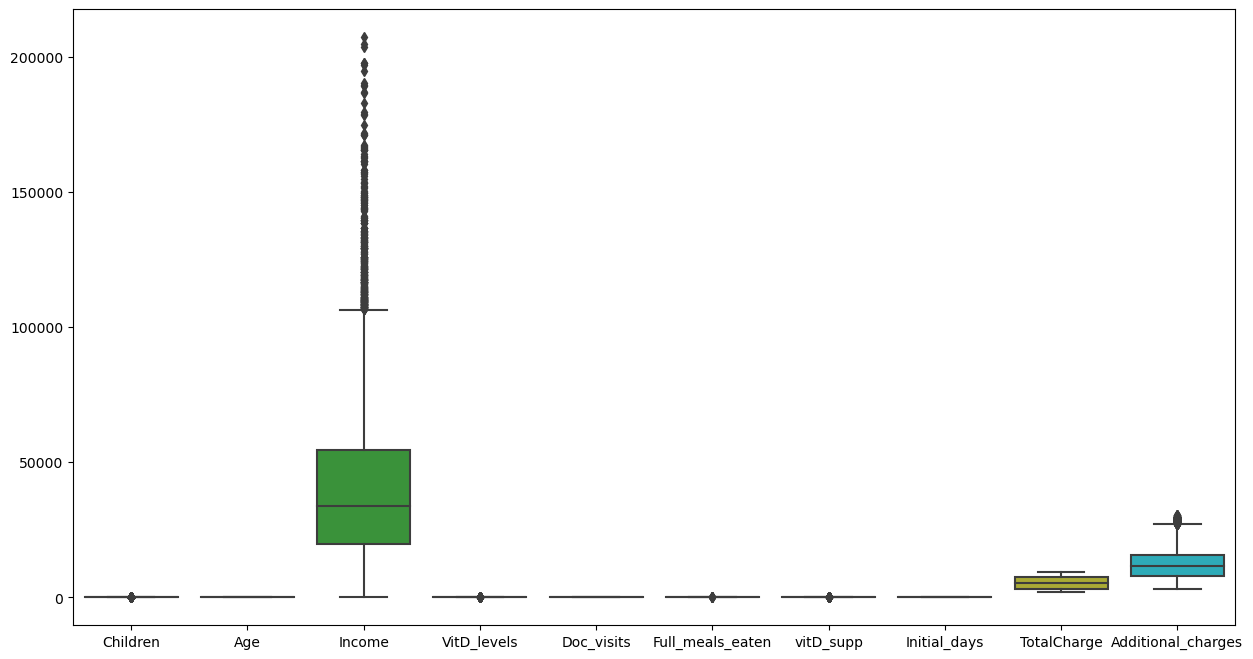

In [95]:
plt.subplots(figsize = (15,8))
sns.boxplot(data = df_quant)

<AxesSubplot:ylabel='Children'>

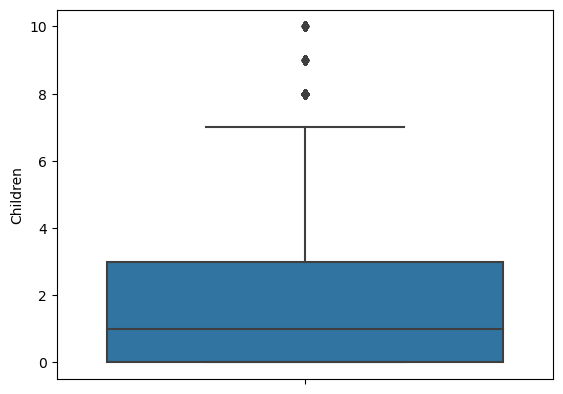

In [96]:
sns.boxplot(y='Children',data = df_quant)

In [97]:
Q3 = df_new['Children'].quantile(0.75) 
Q1 = df_new['Children'].quantile(0.25)
median = df_new['Children'].quantile(0.5)
IQR = Q3-Q1
upper = Q3 + (1.5*IQR)
lower = Q1 -(1.5*IQR)
df_new['Children'] = np.where(df_new['Children']>upper, upper, np.where(df_new['Children']<lower, lower, df_new['Children']))

<AxesSubplot:ylabel='Children'>

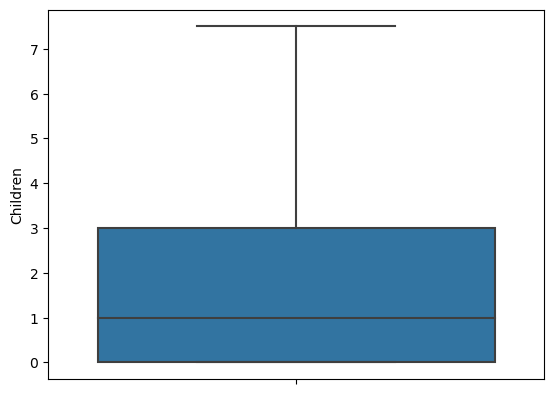

In [98]:
sns.boxplot(y='Children',data = df_new)

<AxesSubplot:ylabel='Income'>

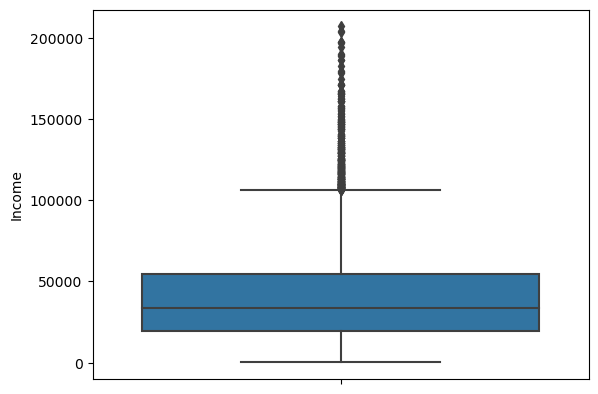

In [99]:
sns.boxplot(y='Income',data = df_quant)

In [100]:
Q3 = df_new['Income'].quantile(0.75) 
Q1 = df_new['Income'].quantile(0.25)
median = df_new['Income'].quantile(0.5)
IQR = Q3-Q1
upper = Q3 + (1.5*IQR)
lower = Q1 -(1.5*IQR)
df_new['Income'] = np.where(df_new['Income']>upper, upper, np.where(df_new['Income']<lower, lower, df_new['Income']))

<AxesSubplot:ylabel='Income'>

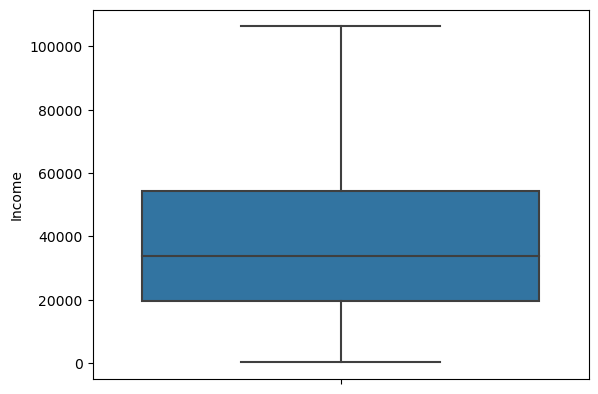

In [101]:
sns.boxplot(y='Income',data = df_new)

<AxesSubplot:ylabel='VitD_levels'>

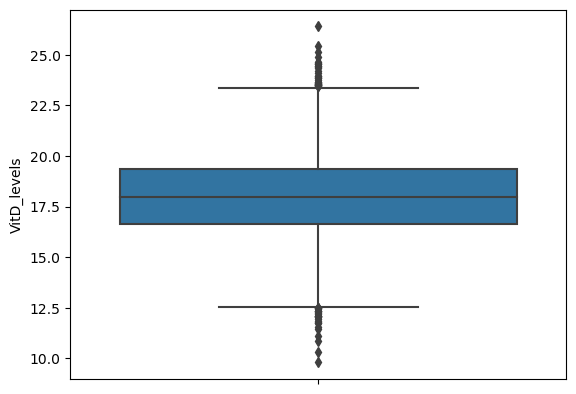

In [102]:
sns.boxplot(y='VitD_levels',data = df_quant)

<AxesSubplot:ylabel='VitD_levels'>

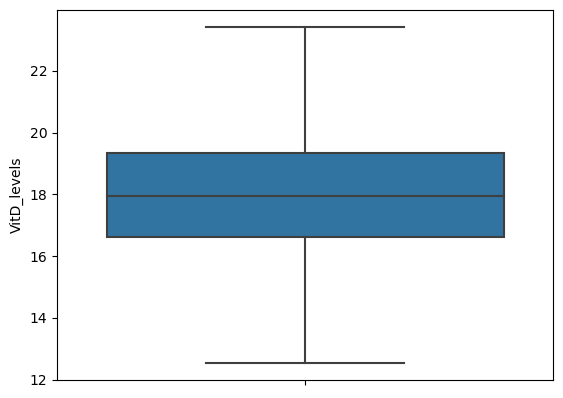

In [103]:
Q3 = df_new['VitD_levels'].quantile(0.75) 
Q1 = df_new['VitD_levels'].quantile(0.25)
median = df_new['VitD_levels'].quantile(0.5)
IQR = Q3-Q1
upper = Q3 + (1.5*IQR)
lower = Q1 -(1.5*IQR)
df_new['VitD_levels'] = np.where(df_new['VitD_levels']>upper, upper, np.where(df_new['VitD_levels']<lower, lower, df_new['VitD_levels']))
sns.boxplot(y='VitD_levels',data = df_new)

<AxesSubplot:ylabel='Full_meals_eaten'>

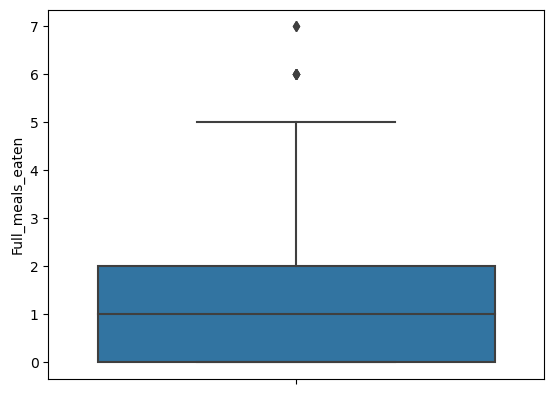

In [104]:
sns.boxplot(y='Full_meals_eaten',data = df_quant)

<AxesSubplot:ylabel='Full_meals_eaten'>

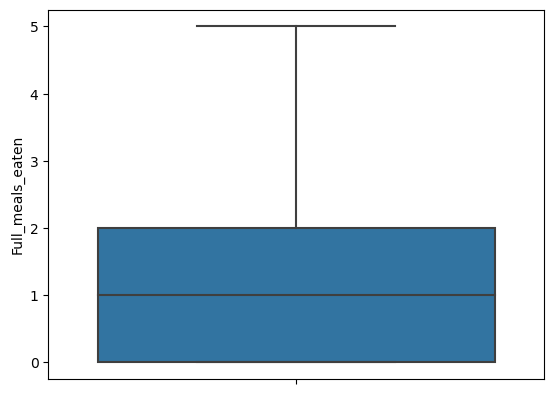

In [105]:
Q3 = df_new['Full_meals_eaten'].quantile(0.75) 
Q1 = df_new['Full_meals_eaten'].quantile(0.25)
median = df_new['Full_meals_eaten'].quantile(0.5)
IQR = Q3-Q1
upper = Q3 + (1.5*IQR)
lower = Q1 -(1.5*IQR)
df_new['Full_meals_eaten'] = np.where(df_new['Full_meals_eaten']>upper, upper, np.where(df_new['Full_meals_eaten']<lower, lower, df_new['Full_meals_eaten']))
sns.boxplot(y='Full_meals_eaten',data = df_new)

<AxesSubplot:ylabel='vitD_supp'>

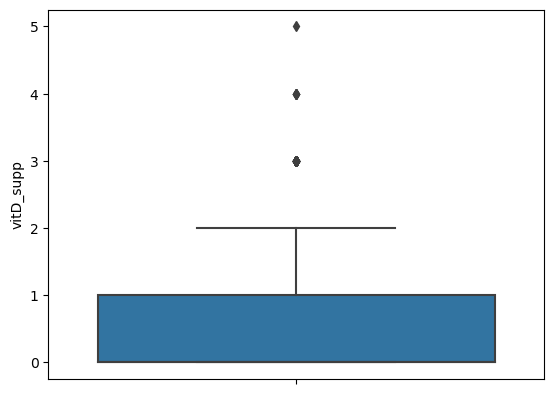

In [106]:
sns.boxplot(y='vitD_supp',data = df_quant)

<AxesSubplot:ylabel='vitD_supp'>

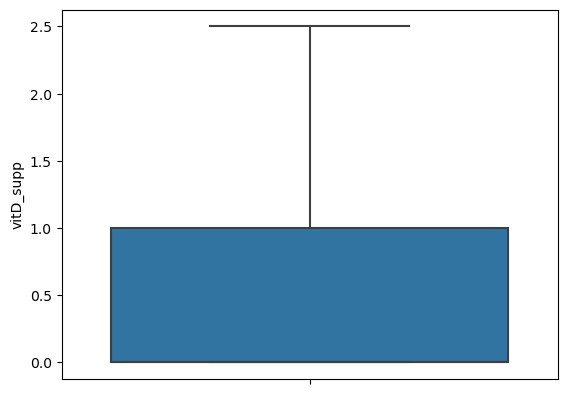

In [107]:
Q3 = df_new['vitD_supp'].quantile(0.75) 
Q1 = df_new['vitD_supp'].quantile(0.25)
median = df_new['vitD_supp'].quantile(0.5)
IQR = Q3-Q1
upper = Q3 + (1.5*IQR)
lower = Q1 -(1.5*IQR)
df_new['vitD_supp'] = np.where(df_new['vitD_supp']>upper, upper, np.where(df_new['vitD_supp']<lower, lower, df_new['vitD_supp']))
sns.boxplot(y='vitD_supp',data = df_new)

<AxesSubplot:ylabel='Additional_charges'>

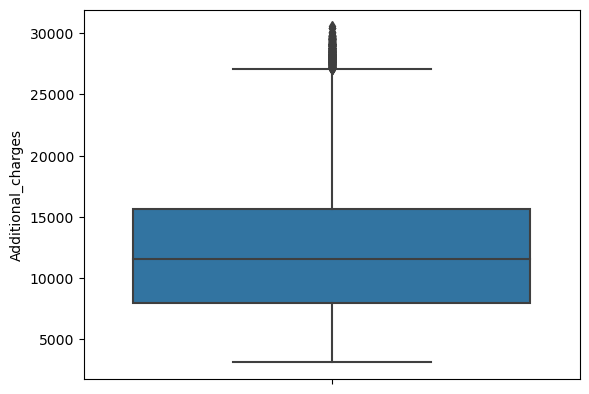

In [108]:
sns.boxplot(y='Additional_charges',data = df_quant)

<AxesSubplot:ylabel='Additional_charges'>

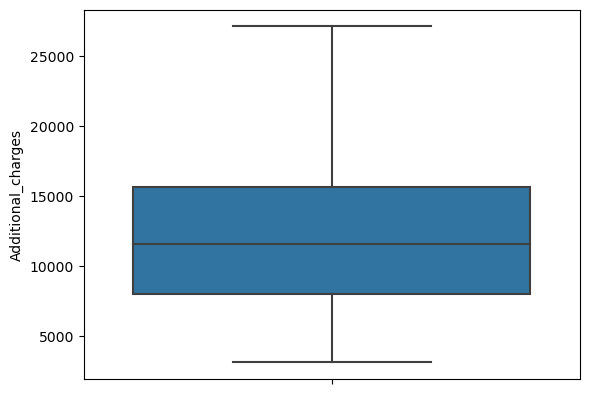

In [109]:
Q3 = df_new['Additional_charges'].quantile(0.75) 
Q1 = df_new['Additional_charges'].quantile(0.25)
median = df_new['Additional_charges'].quantile(0.5)
IQR = Q3-Q1
upper = Q3 + (1.5*IQR)
lower = Q1 -(1.5*IQR)
df_new['Additional_charges'] = np.where(df_new['Additional_charges']>upper, upper, np.where(df_new['Additional_charges']<lower, lower, df_new['Additional_charges']))
sns.boxplot(y='Additional_charges',data = df_new)

array([[<AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'VitD_levels'}>,
        <AxesSubplot:title={'center':'Doc_visits'}>],
       [<AxesSubplot:title={'center':'Full_meals_eaten'}>,
        <AxesSubplot:title={'center':'vitD_supp'}>,
        <AxesSubplot:title={'center':'Soft_drink'}>,
        <AxesSubplot:title={'center':'HighBlood'}>,
        <AxesSubplot:title={'center':'Stroke'}>],
       [<AxesSubplot:title={'center':'Overweight'}>,
        <AxesSubplot:title={'center':'Arthritis'}>,
        <AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Hyperlipidemia'}>,
        <AxesSubplot:title={'center':'BackPain'}>],
       [<AxesSubplot:title={'center':'Anxiety'}>,
        <AxesSubplot:title={'center':'Allergic_rhinitis'}>,
        <AxesSubplot:title={'center':'Reflux_esophagitis'}>,
        <AxesSubplot:title={'center':'Asthma

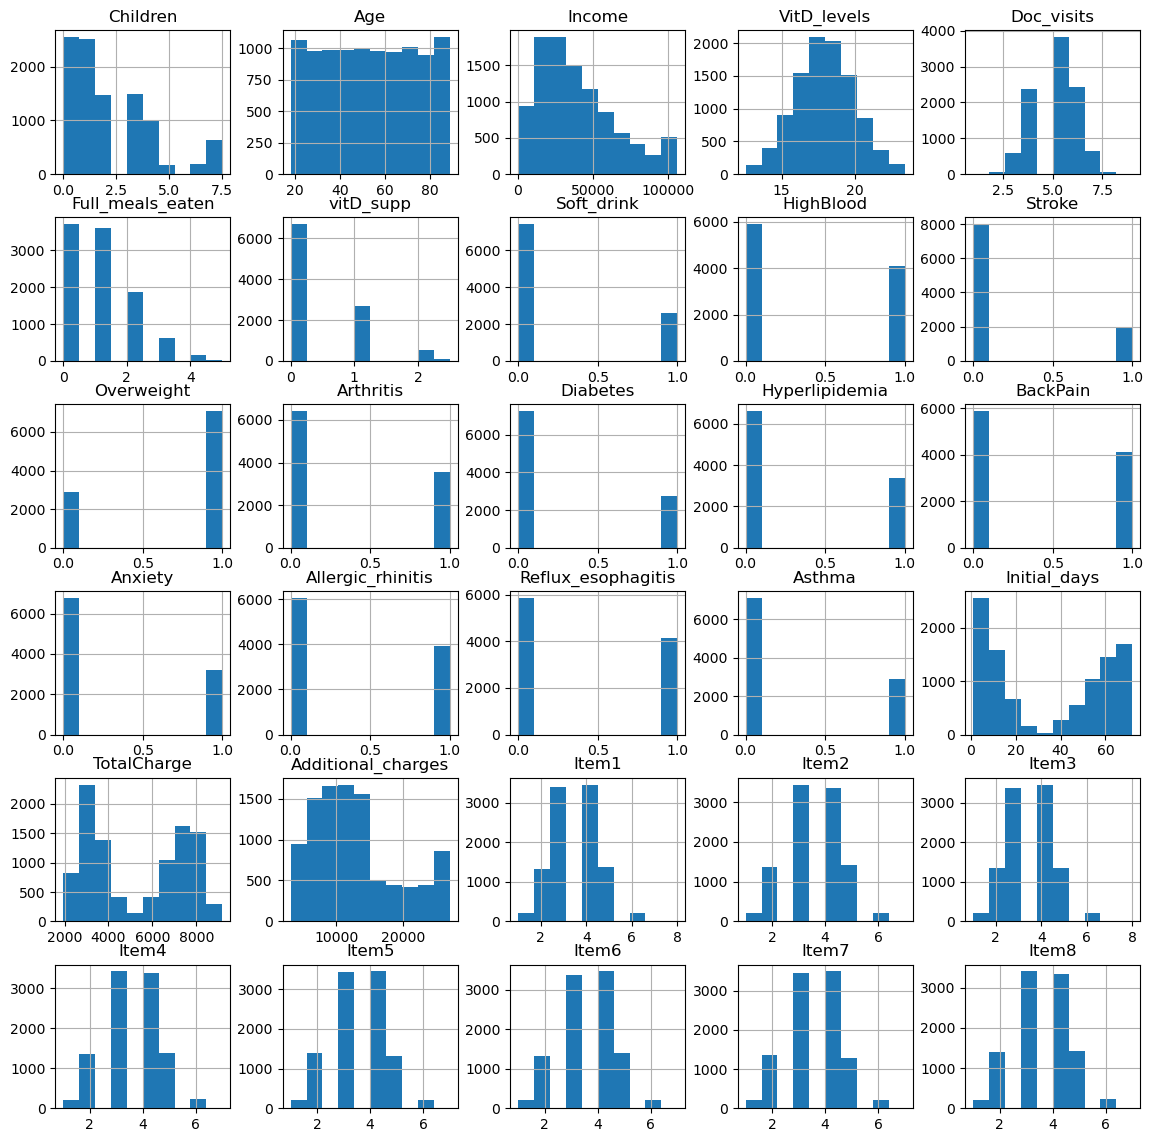

In [110]:
#histogram plot for continuous variables
df_new.hist(figsize = (14,14))

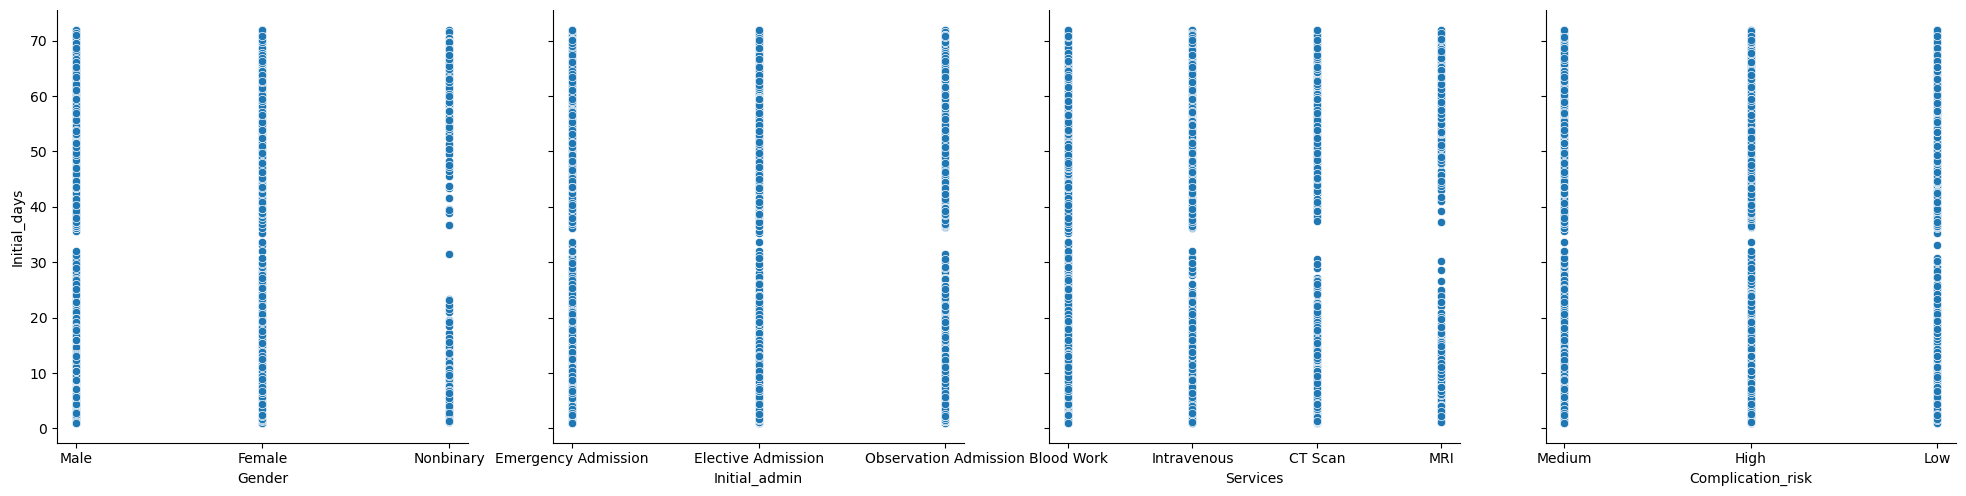

In [111]:
#Bivariate categorical and continous variable
y = 'Initial_days'
x = ['Gender','Initial_admin','Services','Complication_risk']
sns.pairplot(df_new, x_vars = x, y_vars = y, height =5)

In [30]:
df_new['Gender_sub'] = df_new['Gender'].replace(('Male','Female','Nonbinary'),(0,1,2))
df_new['Complication_risk_sub'] = df_new['Complication_risk'].replace(('Low','Medium','High'),(0,1,2))

In [31]:
Initial_admin_dummy = pd.get_dummies(df_new['Initial_admin'], drop_first=True)
Services_dummy = pd.get_dummies(df_new['Services'], drop_first=True)
df_new = pd.concat([df_new,Initial_admin_dummy,Services_dummy], axis = 1)

In [32]:
df_new = df_new.drop(['Gender','Complication_risk','Initial_admin','Services'], axis=1)

In [33]:
df_new.head()

Children  Age    Income  VitD_levels  Doc_visits  Full_meals_eaten  \
0       1.0   53  86575.93    19.141466           6                 0   
1       3.0   51  46805.99    18.940352           4                 2   
2       3.0   53  14370.14    18.057507           4                 1   
3       0.0   78  39741.49    16.576858           4                 1   
4       1.0   22   1209.56    17.439069           5                 0   

   vitD_supp  Soft_drink  HighBlood  Stroke  Overweight  Arthritis  Diabetes  \
0          0           0          1       0           0          1         1   
1          1           0          1       0           1          0         0   
2          0           0          1       0           1          0         1   
3          0           0          0       1           0          1         0   
4          2           1          0       0           0          0         0   

   Hyperlipidemia  BackPain  Anxiety  Allergic_rhinitis  Reflux_esophagitis  \
0               0         1        1                  1                   0   
1               0         0        0                  0                   1   
2               0         0        0                  0                   0   
3               0         0        0                  0                   1   
4               1         0        0                  1                   0   

   Asthma  Initial_days  TotalCharge  Additional_charges  Item1  Item2  Item3  \
0       1     10.585770  3726.702860        17939.403420      3      3      2   
1       0     15.129562  4193.190458        17612.998120      3      4      3   
2       0      4.772177  2434.234222        17505.192460      2      4      4   
3       1      1.714879  2127.830423        12993.437350      3      5      5   
4       0      1.254807  2113.073274         3716.525786      2      1      3   

   Item4  Item5  Item6  Item7  Item8  Gender_sub  Complication_risk_sub  \
0      2      4      3      3      4           0                      1   
1      4      4      4      3      3           1                      2   
2      4      3      4      3      3           1                      1   
3      3      4      5      5      5           0                      1   
4      3      5      3      4      3           1                      0   

   Emergency Admission  Observation Admission  CT Scan  Intravenous  MRI  
0                    1                      0        0            0    0  
1                    1                      0        0            1    0  
2                    0                      0        0            0    0  
3                    0                      0        0            0    0  
4                    0                      0        1            0    0

In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Children               10000 non-null  float64
 1   Age                    10000 non-null  int64  
 2   Income                 10000 non-null  float64
 3   VitD_levels            10000 non-null  float64
 4   Doc_visits             10000 non-null  int64  
 5   Full_meals_eaten       10000 non-null  int64  
 6   vitD_supp              10000 non-null  int64  
 7   Soft_drink             10000 non-null  int64  
 8   HighBlood              10000 non-null  int64  
 9   Stroke                 10000 non-null  int64  
 10  Overweight             10000 non-null  int64  
 11  Arthritis              10000 non-null  int64  
 12  Diabetes               10000 non-null  int64  
 13  Hyperlipidemia         10000 non-null  int64  
 14  BackPain               10000 non-null  int64  
 15  Anx

In [35]:
df_new.to_csv('Predictive_model.csv')

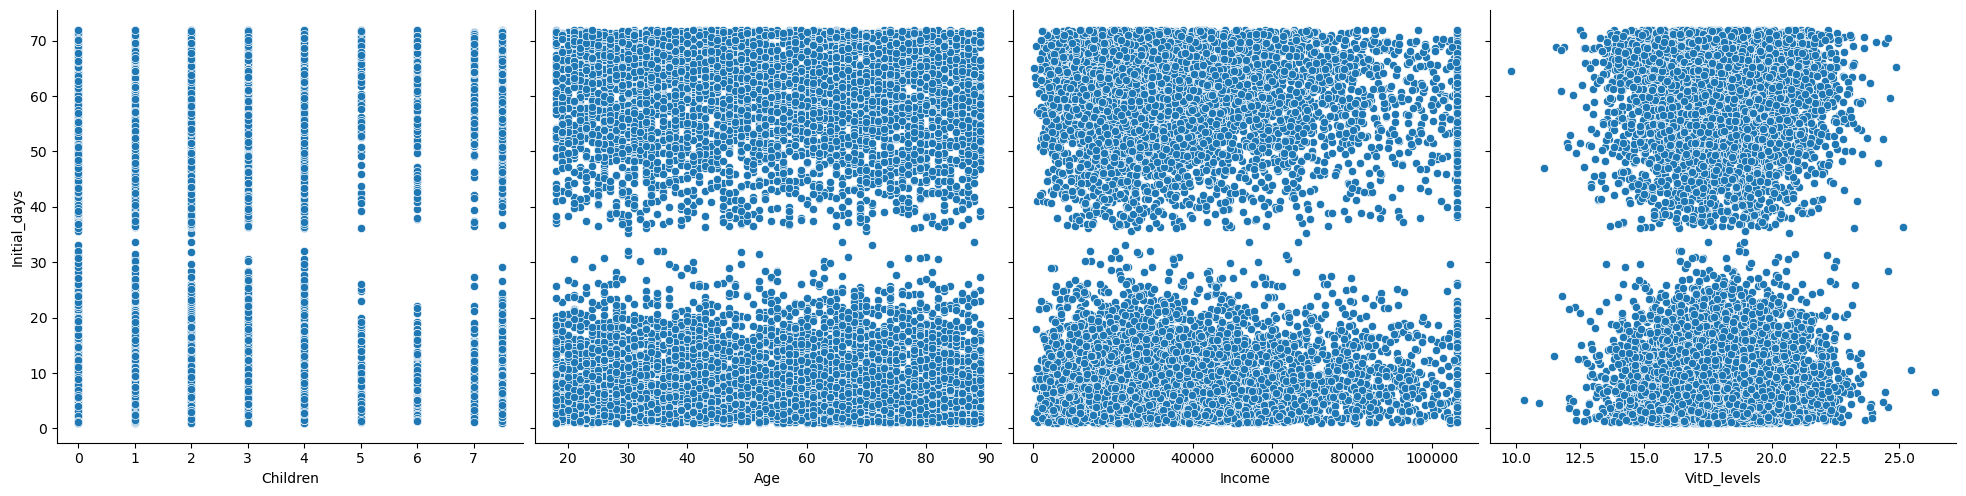

In [36]:
y = 'Initial_days'
x = ['Children','Age','Income','VitD_levels']
sns.pairplot(df_new, x_vars = x, y_vars = y, height =5)

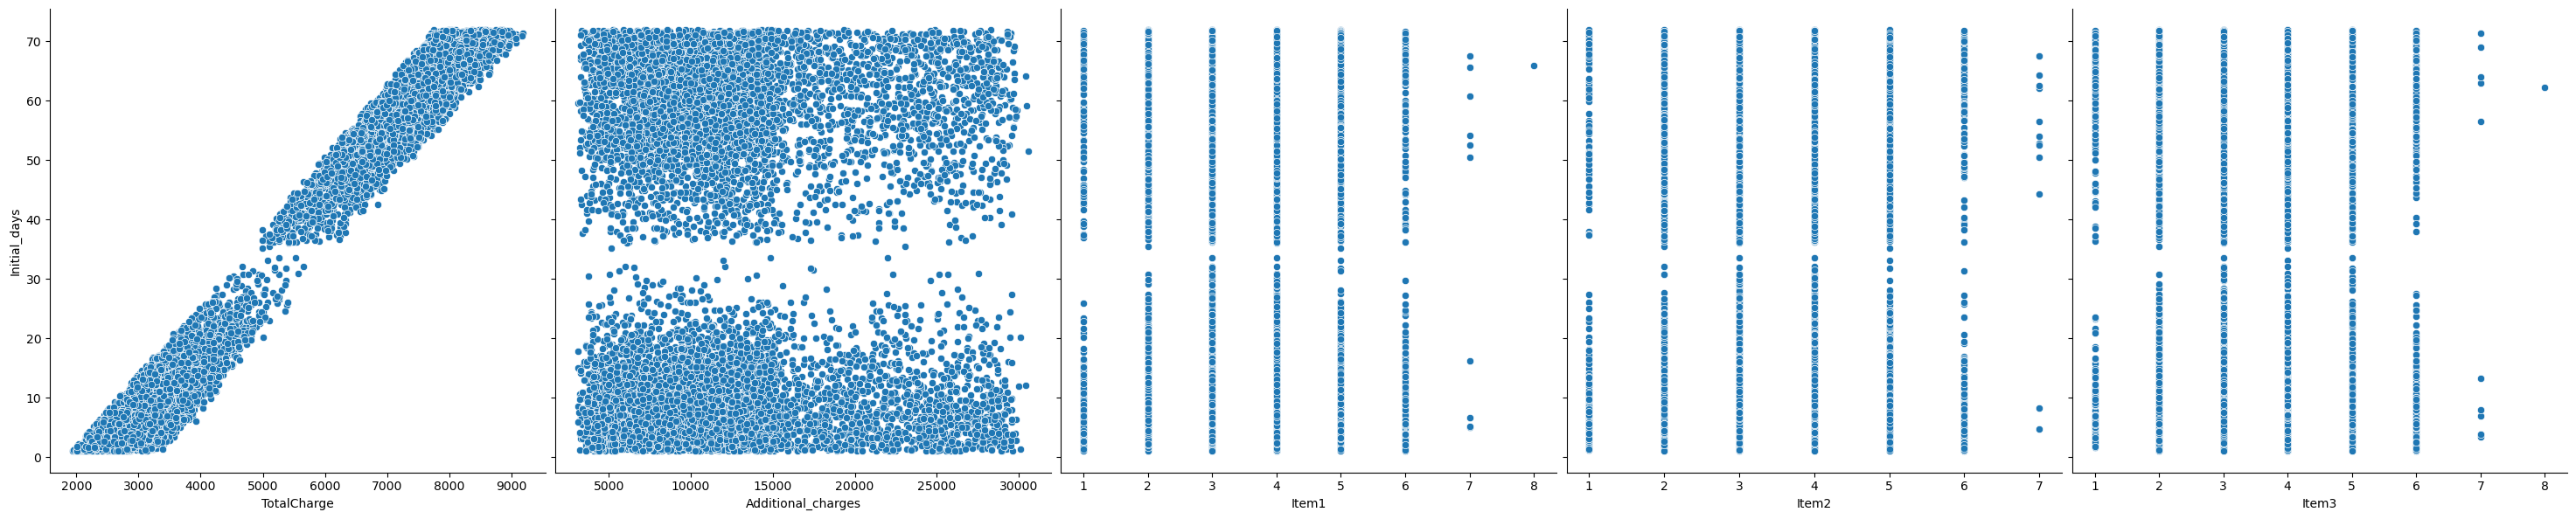

In [37]:
y = 'Initial_days'
x = ['TotalCharge','Additional_charges','Item1','Item2','Item3']
sns.pairplot(df_new, x_vars = x, y_vars = y, height =6)

In [119]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Children               10000 non-null  float64
 1   Age                    10000 non-null  int64  
 2   Income                 10000 non-null  float64
 3   VitD_levels            10000 non-null  float64
 4   Doc_visits             10000 non-null  int64  
 5   Full_meals_eaten       10000 non-null  float64
 6   vitD_supp              10000 non-null  float64
 7   Soft_drink             10000 non-null  int64  
 8   HighBlood              10000 non-null  int64  
 9   Stroke                 10000 non-null  int64  
 10  Overweight             10000 non-null  int64  
 11  Arthritis              10000 non-null  int64  
 12  Diabetes               10000 non-null  int64  
 13  Hyperlipidemia         10000 non-null  int64  
 14  BackPain               10000 non-null  int64  
 15  Anx

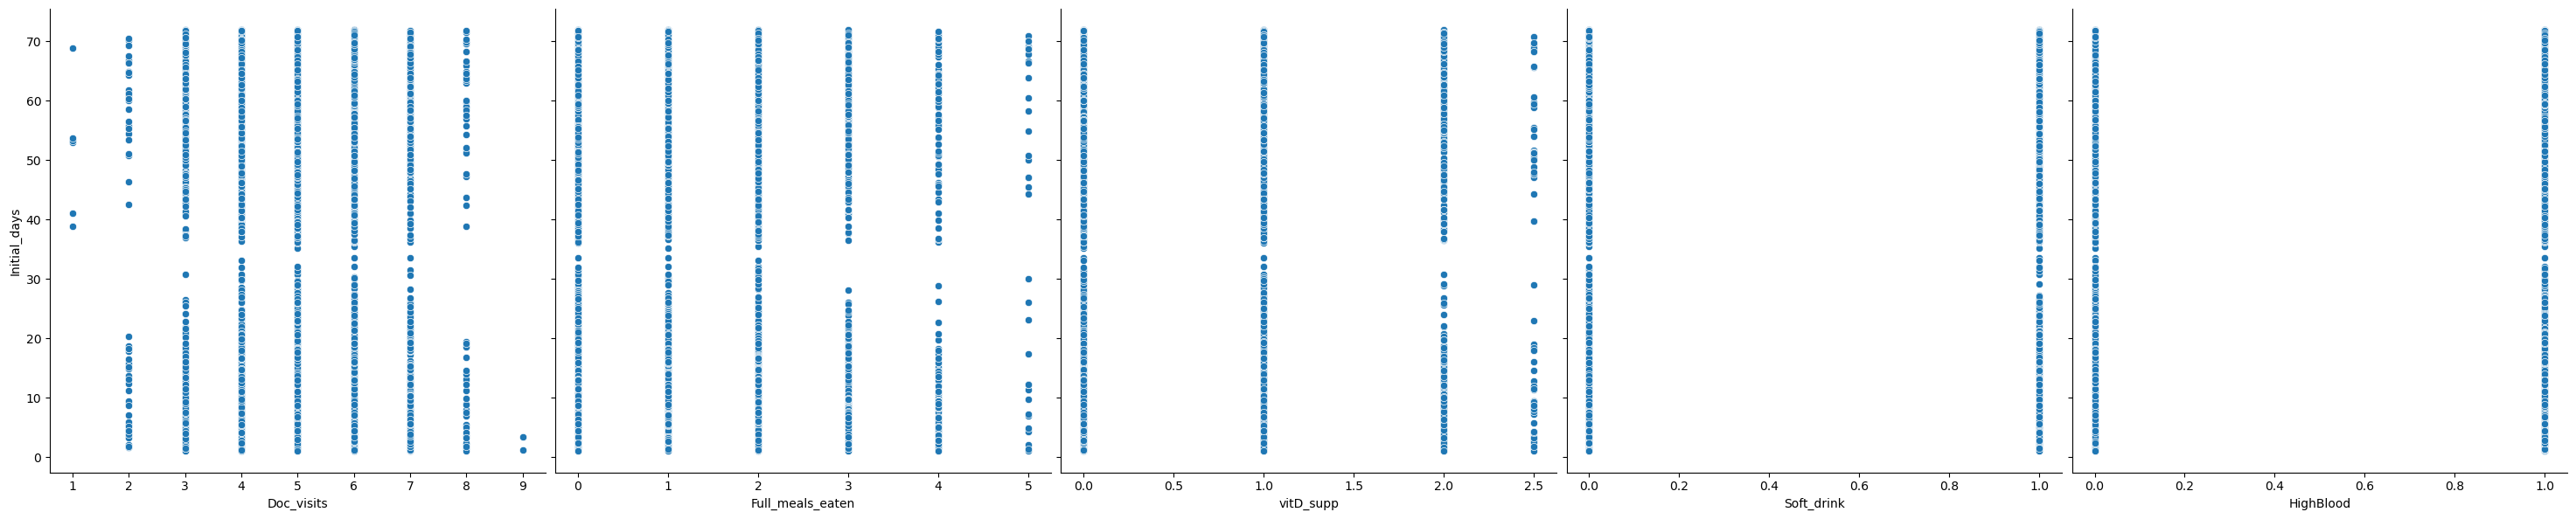

In [120]:
y = 'Initial_days'
x = ['Doc_visits','Full_meals_eaten','vitD_supp','Soft_drink','HighBlood']
sns.pairplot(df_new, x_vars = x, y_vars = y, height =6)

In [38]:
y = df_new['Initial_days']
x = df_new[['Children','Age','Income','VitD_levels','Doc_visits','Full_meals_eaten','vitD_supp','Soft_drink','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','TotalCharge','Additional_charges','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','CT Scan','Intravenous','MRI']]
regr = linear_model.LinearRegression()
regr.fit(x,y)
print('Intercep: \n',regr.intercept_)
print('Coefficients: \n',regr.coef_)
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

Intercep: 
 -21.316182713946915
Coefficients: 
 [-9.78211598e-04  6.52278895e-03 -5.50170991e-07  6.18136740e-03
 -8.24056884e-03 -3.30004446e-03 -2.36225385e-02  2.42199254e-02
 -1.06353622e+00  1.39295211e-02  4.76319681e-02 -8.34567041e-01
 -9.21517879e-01 -1.11433897e+00 -1.06593961e+00 -1.03184583e+00
 -7.80710705e-01 -7.36664135e-01  1.18909399e-02  1.21702451e-02
 -2.99682164e-05 -6.38942692e-03 -3.30811593e-03  2.09282480e-02
  5.90676014e-03  1.25014886e-02  1.97082416e-02 -3.01840624e-02
  3.48744658e-03 -2.38735296e-02 -2.77175510e+00 -6.22064117e+00
  6.08449450e-02  2.33888610e-02 -7.31251144e-03  7.32496913e-02]
                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.252e+05
Date:                Tue, 24 Jan 2023   Prob (F-st

In [122]:
#remove children
y = df_new['Initial_days']
x = df_new[['Age','Income','VitD_levels','Doc_visits','Full_meals_eaten','vitD_supp','Soft_drink','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','TotalCharge','Additional_charges','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','CT Scan','Intravenous','MRI']]
regr = linear_model.LinearRegression()
regr.fit(x,y)
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.288e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:43   Log-Likelihood:                -16305.
No. Observations:               10000   AIC:                         3.268e+04
Df Residuals:                    9964   BIC:                         3.294e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.30

In [123]:
#Removal Item2
y = df_new['Initial_days']
x = df_new[['Age','Income','VitD_levels','Doc_visits','Full_meals_eaten','vitD_supp','Soft_drink','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','TotalCharge','Additional_charges','Item1','Item3','Item4','Item5','Item6','Item7','Item8','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','CT Scan','Intravenous','MRI']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.326e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:43   Log-Likelihood:                -16305.
No. Observations:               10000   AIC:                         3.268e+04
Df Residuals:                    9965   BIC:                         3.293e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.30

In [124]:
#Remove full meal eaten
y = df_new['Initial_days']
x = df_new[['Age','Income','VitD_levels','Doc_visits','vitD_supp','Soft_drink','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','TotalCharge','Additional_charges','Item1','Item3','Item4','Item5','Item6','Item7','Item8','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','CT Scan','Intravenous','MRI']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.366e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:43   Log-Likelihood:                -16305.
No. Observations:               10000   AIC:                         3.268e+04
Df Residuals:                    9966   BIC:                         3.292e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.30

In [125]:
#remove Intravenous
y = df_new['Initial_days']
x = df_new[['Age','Income','VitD_levels','Doc_visits','vitD_supp','Soft_drink','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','TotalCharge','Additional_charges','Item1','Item3','Item4','Item5','Item6','Item7','Item8','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','CT Scan','MRI']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.409e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:43   Log-Likelihood:                -16305.
No. Observations:               10000   AIC:                         3.268e+04
Df Residuals:                    9967   BIC:                         3.291e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.31

In [126]:
#remove item8
y = df_new['Initial_days']
x = df_new[['Age','Income','VitD_levels','Doc_visits','vitD_supp','Soft_drink','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','TotalCharge','Additional_charges','Item1','Item3','Item4','Item5','Item6','Item7','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','CT Scan','MRI']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.454e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:43   Log-Likelihood:                -16305.
No. Observations:               10000   AIC:                         3.267e+04
Df Residuals:                    9968   BIC:                         3.291e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.30

In [127]:
#remove stroke
y = df_new['Initial_days']
x = df_new[['Age','Income','VitD_levels','Doc_visits','vitD_supp','Soft_drink','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma','TotalCharge','Additional_charges','Item1','Item3','Item4','Item5','Item6','Item7','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','CT Scan','MRI']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.503e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:43   Log-Likelihood:                -16305.
No. Observations:               10000   AIC:                         3.267e+04
Df Residuals:                    9969   BIC:                         3.290e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.29

In [128]:
#remove asthma
y = df_new['Initial_days']
x = df_new[['Age','Income','VitD_levels','Doc_visits','vitD_supp','Soft_drink','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item1','Item3','Item4','Item5','Item6','Item7','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','CT Scan','MRI']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.555e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:43   Log-Likelihood:                -16306.
No. Observations:               10000   AIC:                         3.267e+04
Df Residuals:                    9970   BIC:                         3.289e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.29

In [129]:
#remove item4
y = df_new['Initial_days']
x = df_new[['Age','Income','VitD_levels','Doc_visits','vitD_supp','Soft_drink','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item1','Item3','Item5','Item6','Item7','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','CT Scan','MRI']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.611e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:44   Log-Likelihood:                -16306.
No. Observations:               10000   AIC:                         3.267e+04
Df Residuals:                    9971   BIC:                         3.288e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.26

In [130]:
#remove item1
y = df_new['Initial_days']
x = df_new[['Age','Income','VitD_levels','Doc_visits','vitD_supp','Soft_drink','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item3','Item5','Item6','Item7','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','CT Scan','MRI']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.670e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:44   Log-Likelihood:                -16306.
No. Observations:               10000   AIC:                         3.267e+04
Df Residuals:                    9972   BIC:                         3.287e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.26

In [131]:
#remove item5
y = df_new['Initial_days']
x = df_new[['Age','Income','VitD_levels','Doc_visits','vitD_supp','Soft_drink','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item3','Item6','Item7','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','CT Scan','MRI']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.735e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:44   Log-Likelihood:                -16306.
No. Observations:               10000   AIC:                         3.267e+04
Df Residuals:                    9973   BIC:                         3.286e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.22

In [132]:
#remove doc_visit
y = df_new['Initial_days']
x = df_new[['Age','Income','VitD_levels','vitD_supp','Soft_drink','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item3','Item6','Item7','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','CT Scan','MRI']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.804e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:44   Log-Likelihood:                -16306.
No. Observations:               10000   AIC:                         3.266e+04
Df Residuals:                    9974   BIC:                         3.285e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.26

In [133]:
#remove CT scan
y = df_new['Initial_days']
x = df_new[['Age','Income','VitD_levels','vitD_supp','Soft_drink','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item3','Item6','Item7','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','MRI']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.879e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:44   Log-Likelihood:                -16306.
No. Observations:               10000   AIC:                         3.266e+04
Df Residuals:                    9975   BIC:                         3.284e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.26

In [134]:
#remove soft_drink
y = df_new['Initial_days']
x = df_new[['Age','Income','VitD_levels','vitD_supp','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item3','Item6','Item7','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','MRI']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.961e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:45   Log-Likelihood:                -16307.
No. Observations:               10000   AIC:                         3.266e+04
Df Residuals:                    9976   BIC:                         3.283e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.25

In [135]:
#remove vitD_levels
y = df_new['Initial_days']
x = df_new[['Age','Income','vitD_supp','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item3','Item6','Item7','Gender_sub','Complication_risk_sub','Emergency Admission','Observation Admission','MRI']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.050e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:45   Log-Likelihood:                -16307.
No. Observations:               10000   AIC:                         3.266e+04
Df Residuals:                    9977   BIC:                         3.283e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.14

In [136]:
#remove gender_sub
y = df_new['Initial_days']
x = df_new[['Age','Income','vitD_supp','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item3','Item6','Item7','Complication_risk_sub','Emergency Admission','Observation Admission','MRI']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.148e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:45   Log-Likelihood:                -16308.
No. Observations:               10000   AIC:                         3.266e+04
Df Residuals:                    9978   BIC:                         3.282e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.15

In [137]:
#remove MRI
y = df_new['Initial_days']
x = df_new[['Age','Income','vitD_supp','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item3','Item6','Item7','Complication_risk_sub','Emergency Admission','Observation Admission']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.255e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:45   Log-Likelihood:                -16308.
No. Observations:               10000   AIC:                         3.266e+04
Df Residuals:                    9979   BIC:                         3.281e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.15

In [138]:
#remove income
y = df_new['Initial_days']
x = df_new[['Age','vitD_supp','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item3','Item6','Item7','Complication_risk_sub','Emergency Admission','Observation Admission']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.374e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:45   Log-Likelihood:                -16309.
No. Observations:               10000   AIC:                         3.266e+04
Df Residuals:                    9980   BIC:                         3.280e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.17

In [139]:
#remove item6
y = df_new['Initial_days']
x = df_new[['Age','vitD_supp','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item3','Item7','Complication_risk_sub','Emergency Admission','Observation Admission']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.506e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:46   Log-Likelihood:                -16310.
No. Observations:               10000   AIC:                         3.266e+04
Df Residuals:                    9981   BIC:                         3.279e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.15

In [140]:
#remove vitD_supp
y = df_new['Initial_days']
x = df_new[['Age','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item3','Item7','Complication_risk_sub','Emergency Admission','Observation Admission']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.653e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:46   Log-Likelihood:                -16311.
No. Observations:               10000   AIC:                         3.266e+04
Df Residuals:                    9982   BIC:                         3.279e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.16

In [141]:
#remove Observation Admission
y = df_new['Initial_days']
x = df_new[['Age','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item3','Item7','Complication_risk_sub','Emergency Admission']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.818e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:46   Log-Likelihood:                -16312.
No. Observations:               10000   AIC:                         3.266e+04
Df Residuals:                    9983   BIC:                         3.278e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.13

In [142]:
#remove item3
y = df_new['Initial_days']
x = df_new[['Age','HighBlood','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item7','Complication_risk_sub','Emergency Admission']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.006e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:46   Log-Likelihood:                -16314.
No. Observations:               10000   AIC:                         3.266e+04
Df Residuals:                    9984   BIC:                         3.277e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.07

In [143]:
#remove Overweight
y = df_new['Initial_days']
x = df_new[['Age','HighBlood','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Item7','Complication_risk_sub','Emergency Admission']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.220e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:46   Log-Likelihood:                -16315.
No. Observations:               10000   AIC:                         3.266e+04
Df Residuals:                    9985   BIC:                         3.277e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.03

In [144]:
#remove item7
y = df_new['Initial_days']
x = df_new[['Age','HighBlood','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Complication_risk_sub','Emergency Admission']]
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())
regr = linear_model.LinearRegression()
model = regr.fit(x, y)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.466e+05
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:45:47   Log-Likelihood:                -16317.
No. Observations:               10000   AIC:                         3.266e+04
Df Residuals:                    9986   BIC:                         3.276e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.11

In [145]:
df_new[['Age','HighBlood','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Complication_risk_sub','Emergency Admission']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   HighBlood              10000 non-null  int64  
 2   Arthritis              10000 non-null  int64  
 3   Diabetes               10000 non-null  int64  
 4   Hyperlipidemia         10000 non-null  int64  
 5   BackPain               10000 non-null  int64  
 6   Anxiety                10000 non-null  int64  
 7   Allergic_rhinitis      10000 non-null  int64  
 8   Reflux_esophagitis     10000 non-null  int64  
 9   TotalCharge            10000 non-null  float64
 10  Additional_charges     10000 non-null  float64
 11  Complication_risk_sub  10000 non-null  int64  
 12  Emergency Admission    10000 non-null  uint8  
dtypes: float64(2), int64(10), uint8(1)
memory usage: 947.4 KB


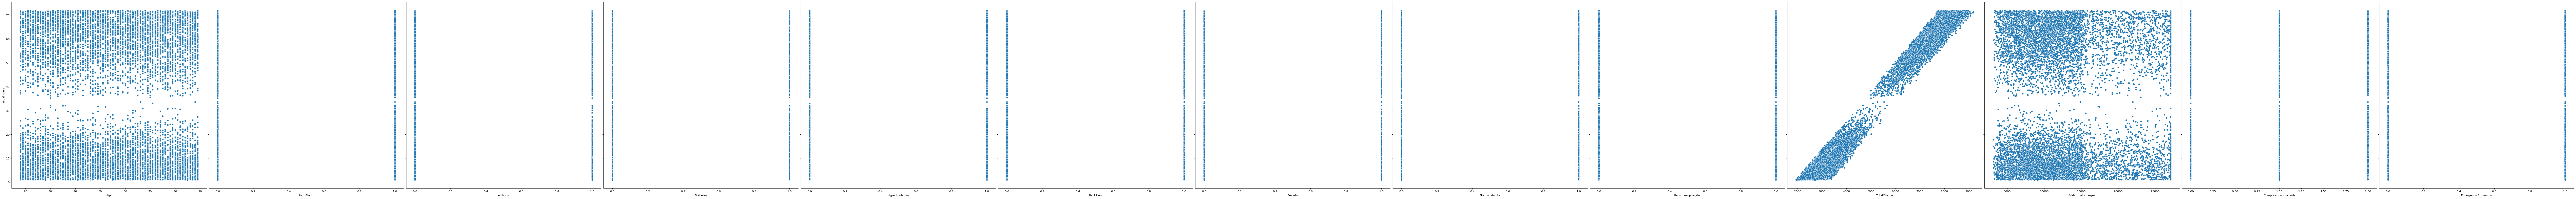

In [146]:
y = 'Initial_days'
x = ['Age','HighBlood','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Complication_risk_sub','Emergency Admission']
sns.pairplot(df_new, x_vars = x, y_vars = y, height =10)

Age  HighBlood  Arthritis  Diabetes  \
Age                    1.000000   0.007147   0.007110  0.003694   
HighBlood              0.007147   1.000000   0.007314 -0.005858   
Arthritis              0.007110   0.007314   1.000000  0.009097   
Diabetes               0.003694  -0.005858   0.009097  1.000000   
Hyperlipidemia         0.003736  -0.009529  -0.007130  0.011739   
BackPain               0.021081   0.003048  -0.018804 -0.013405   
Anxiety                0.006130   0.008303   0.012045 -0.002529   
Allergic_rhinitis      0.012092   0.011709   0.008748  0.005486   
Reflux_esophagitis    -0.019609   0.001150   0.014894 -0.007816   
TotalCharge            0.016876   0.019910   0.032932  0.011524   
Additional_charges     0.717294   0.656904   0.005607  0.002242   
Complication_risk_sub  0.002887   0.021368  -0.015054 -0.006633   
Emergency Admission   -0.004538  -0.001440  -0.000603 -0.008266   

                       Hyperlipidemia  BackPain   Anxiety  Allergic_rhinitis  \
Age                          0.003736  0.021081  0.006130           0.012092   
HighBlood                   -0.009529  0.003048  0.008303           0.011709   
Arthritis                   -0.007130 -0.018804  0.012045           0.008748   
Diabetes                     0.011739 -0.013405 -0.002529           0.005486   
Hyperlipidemia               1.000000 -0.000963 -0.013178          -0.009049   
BackPain                    -0.000963  1.000000  0.009289           0.004023   
Anxiety                     -0.013178  0.009289  1.000000           0.004368   
Allergic_rhinitis           -0.009049  0.004023  0.004368           1.000000   
Reflux_esophagitis           0.001580  0.016036 -0.007566          -0.007731   
TotalCharge                  0.017565  0.035828  0.031199           0.018919   
Additional_charges          -0.002229  0.014756  0.011434           0.016231   
Complication_risk_sub       -0.000802 -0.015379 -0.000707          -0.002782   
Emergency Admission          0.018941  0.000535  0.008655           0.006080   

                       Reflux_esophagitis  TotalCharge  Additional_charges  \
Age                             -0.019609     0.016876            0.717294   
HighBlood                        0.001150     0.019910            0.656904   
Arthritis                        0.014894     0.032932            0.005607   
Diabetes                        -0.007816     0.011524            0.002242   
Hyperlipidemia                   0.001580     0.017565           -0.002229   
BackPain                         0.016036     0.035828            0.014756   
Anxiety                         -0.007566     0.031199            0.011434   
Allergic_rhinitis               -0.007731     0.018919            0.016231   
Reflux_esophagitis               1.000000     0.026284           -0.011417   
TotalCharge                      0.026284     1.000000            0.029375   
Additional_charges              -0.011417     0.029375            1.000000   
Complication_risk_sub            0.003102     0.061834            0.045250   
Emergency Admission             -0.000126     0.106985            0.034008   

                       Complication_risk_sub  Emergency Admission  
Age                                 0.002887            -0.004538  
HighBlood                           0.021368            -0.001440  
Arthritis                          -0.015054            -0.000603  
Diabetes                           -0.006633            -0.008266  
Hyperlipidemia                     -0.000802             0.018941  
BackPain                           -0.015379             0.000535  
Anxiety                            -0.000707             0.008655  
Allergic_rhinitis                  -0.002782             0.006080  
Reflux_esophagitis                  0.003102            -0.000126  
TotalCharge                         0.061834             0.106985  
Additional_charges                  0.045250             0.034008  
Complication_risk_sub               1.000000            -0.

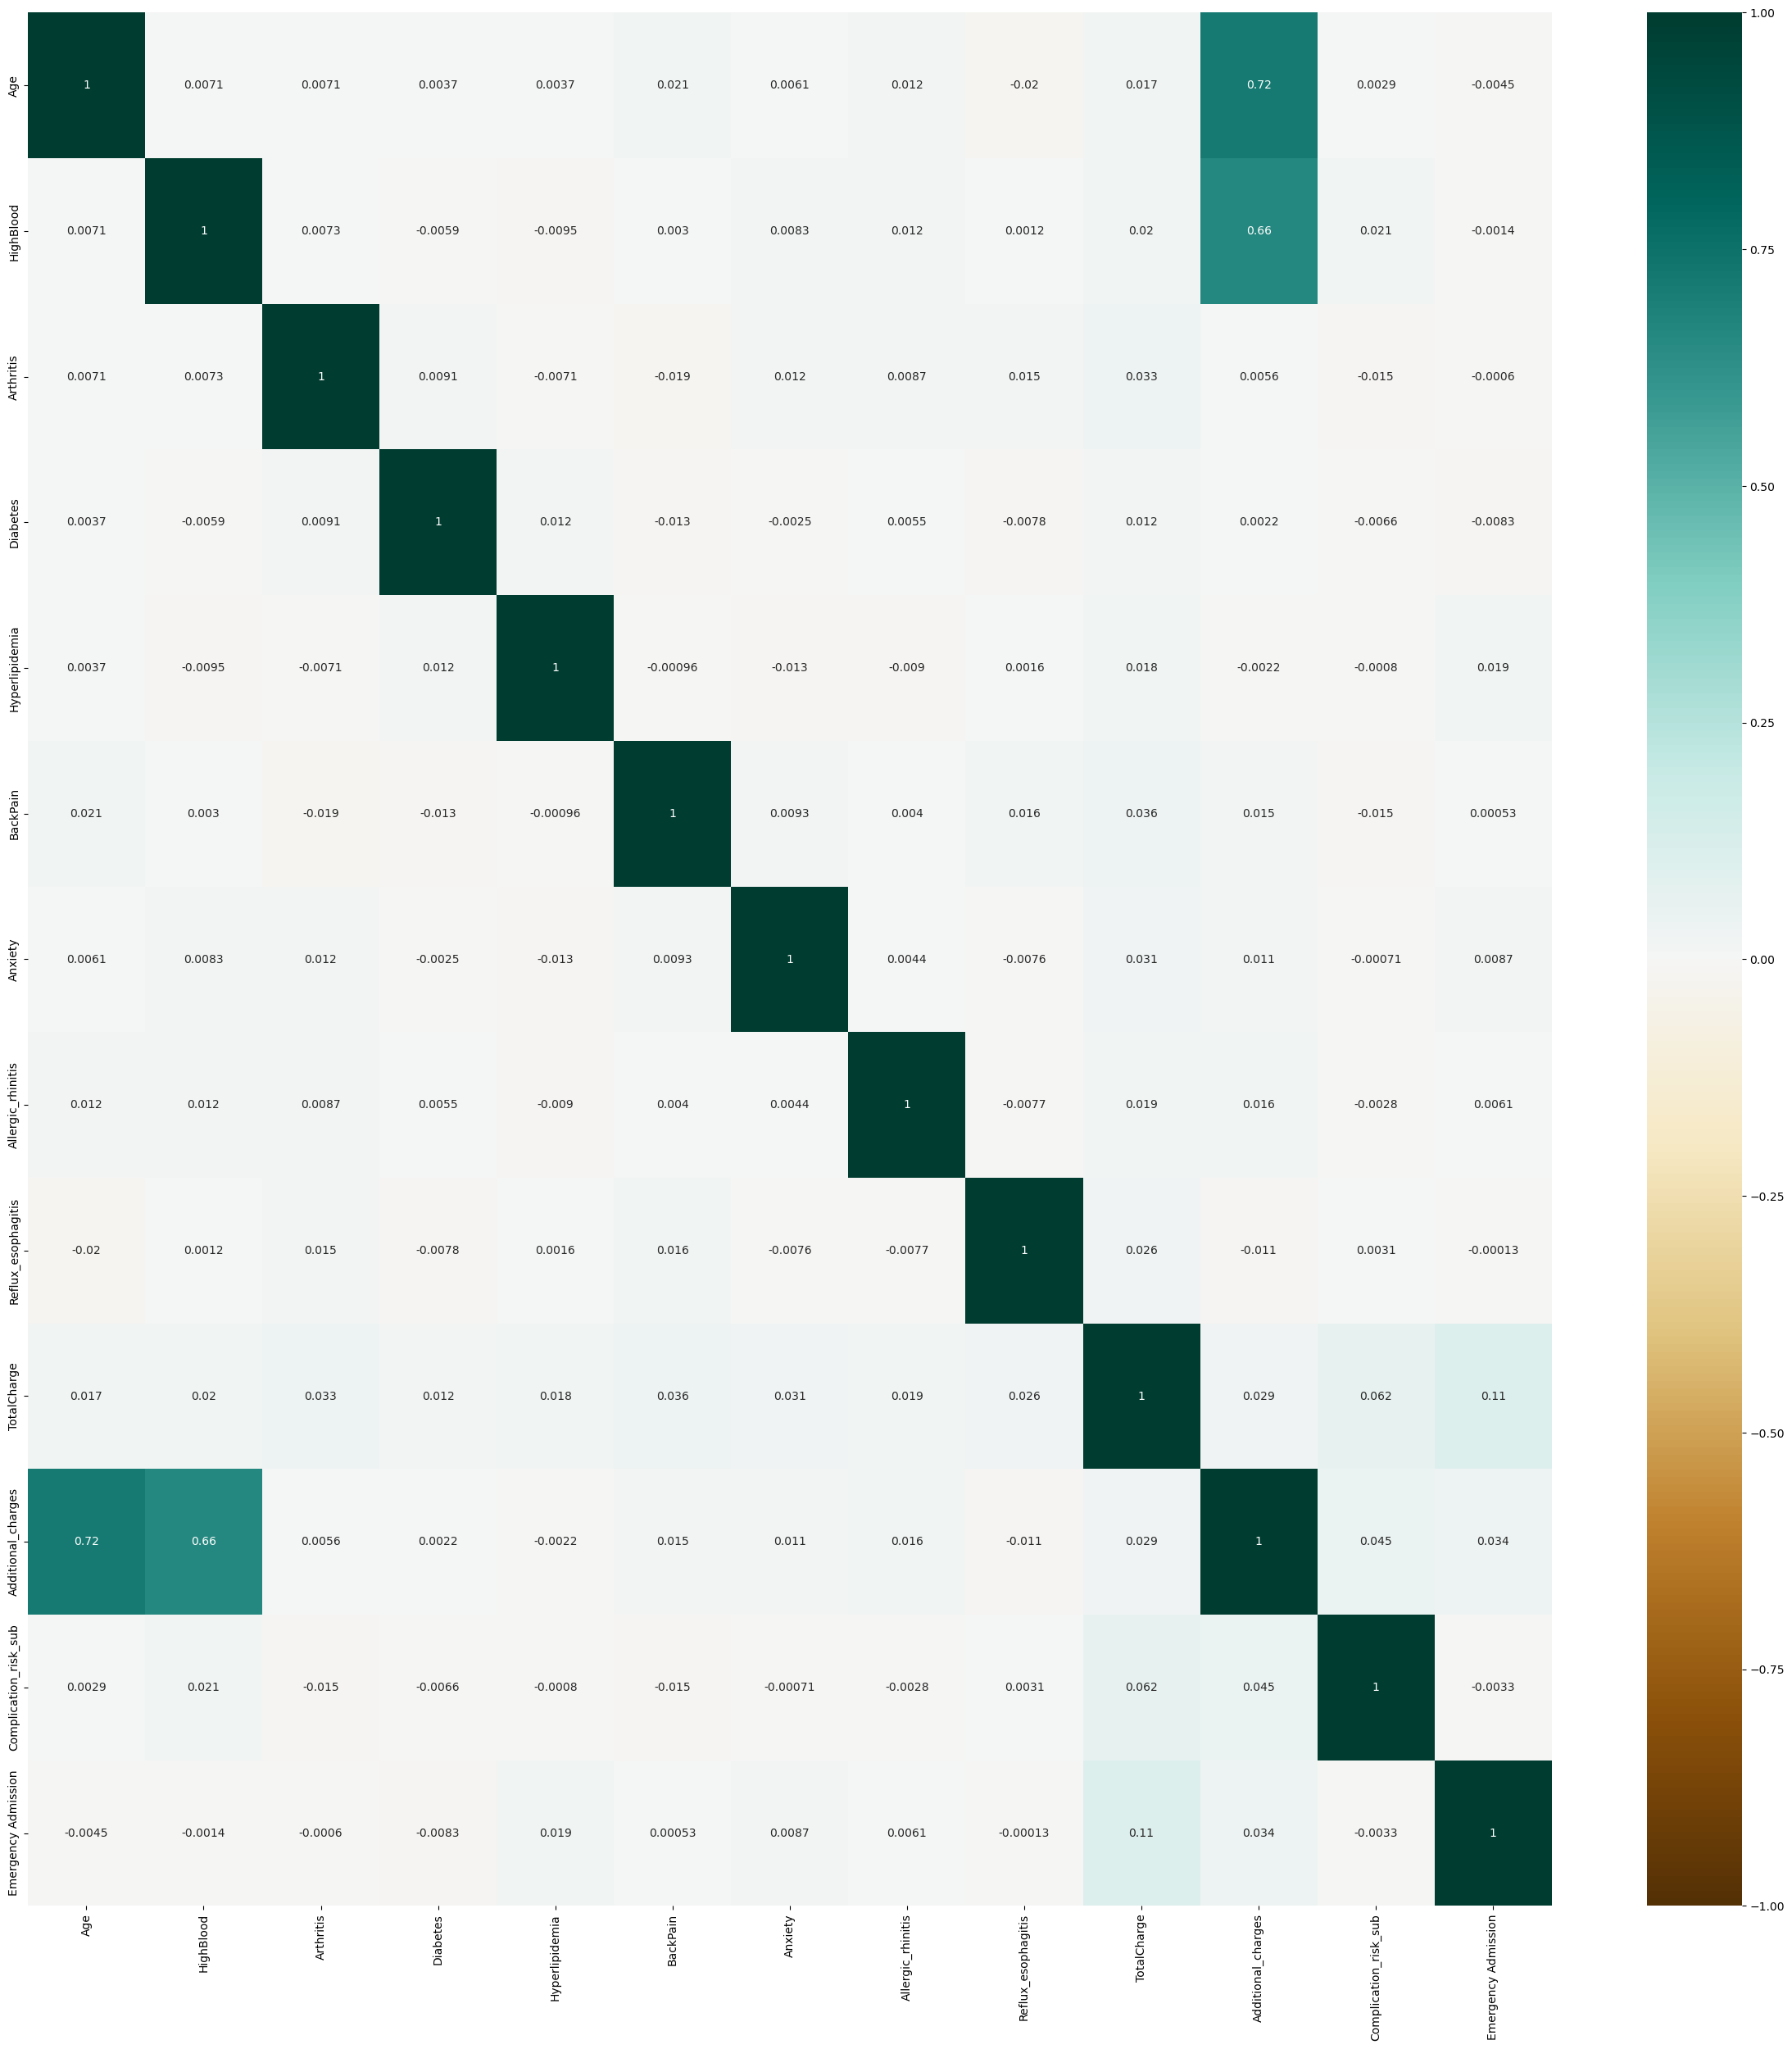

In [147]:
#create heatmap and correlation check
df_heatmap = df_new[['Age','HighBlood','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Complication_risk_sub','Emergency Admission']]
plt.subplots(figsize=(30,30))
c = df_heatmap.corr()
sns.heatmap(c,cmap = 'BrBG',annot=True, vmin = -1, vmax =1)
c

In [148]:
#VIF check
x = df_new[['Age','HighBlood','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Additional_charges','Complication_risk_sub','Emergency Admission']] 
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

                  feature        VIF
0                     Age  52.927742
1               HighBlood  11.484828
2               Arthritis   1.533981
3                Diabetes   1.355194
4          Hyperlipidemia   1.481275
5                BackPain   1.667586
6                 Anxiety   1.453218
7       Allergic_rhinitis   1.615272
8      Reflux_esophagitis   1.657523
9             TotalCharge   5.816824
10     Additional_charges  72.646116
11  Complication_risk_sub   3.045436
12    Emergency Admission   1.997294


In [149]:
#remove Additional charge
x = df_new[['Age','HighBlood','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Complication_risk_sub','Emergency Admission']] 
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

                  feature       VIF
0                     Age  5.243908
1               HighBlood  1.648527
2               Arthritis  1.525568
3                Diabetes  1.353168
4          Hyperlipidemia  1.476265
5                BackPain  1.658863
6                 Anxiety  1.449924
7       Allergic_rhinitis  1.608314
8      Reflux_esophagitis  1.650107
9             TotalCharge  5.562300
10  Complication_risk_sub  3.044771
11    Emergency Admission  1.985618


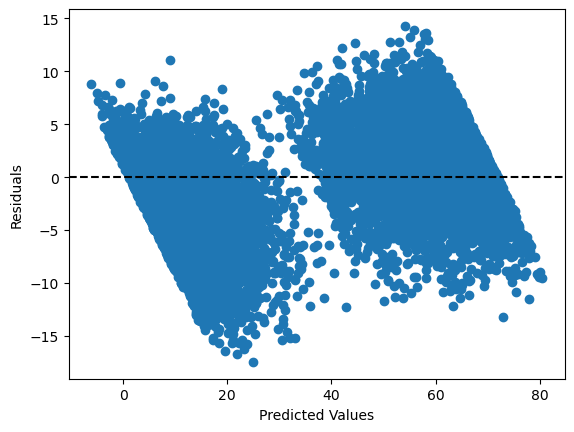

In [150]:
#scatterplot residuals
y= df_new['Initial_days']
x = df_new[['Age','HighBlood','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Complication_risk_sub','Emergency Admission']] 
model = sm.OLS(y,x).fit()
residuals = model.resid
plt.scatter(model.predict(), residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

In [151]:
print(residuals)
MSE = sum((residuals)**2)/len(residuals)
print(MSE)

0        3.582251
1       -2.011265
2       -5.407749
3       -2.237499
4      -14.482940
          ...    
9995    -1.065676
9996     5.998277
9997     0.973615
9998    -0.937746
9999    -0.765504
Length: 10000, dtype: float64
23.806648300278045


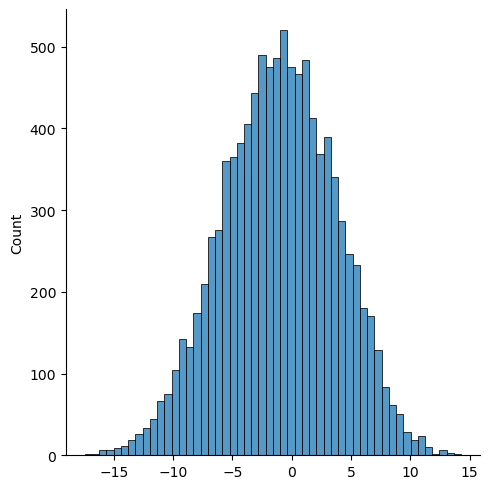

In [152]:
sns.displot(model.resid)
plt.show()

In [168]:
y= df_new['Initial_days']
x = df_new[['Age','HighBlood','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','TotalCharge','Complication_risk_sub','Emergency Admission']]
reg = LinearRegression()
reg.fit(x,y)
y_pred = reg.predict(x)
print("Observed values of Y:", y)
print("Predicted values of Y:", y_pred)
print(residuals)

Observed values of Y: 0       10.585770
1       15.129562
2        4.772177
3        1.714879
4        1.254807
          ...    
9995    51.561220
9996    68.668240
9997    70.154180
9998    63.356900
9999    70.850590
Name: Initial_days, Length: 10000, dtype: float64
Predicted values of Y: [ 9.30025429 16.09602901  3.54944088 ... 70.97683668 61.87850212
 72.20672921]
0        3.582251
1       -2.011265
2       -5.407749
3       -2.237499
4      -14.482940
          ...    
9995    -1.065676
9996     5.998277
9997     0.973615
9998    -0.937746
9999    -0.765504
Length: 10000, dtype: float64
